# Decision Tree

In [4]:
# Author : Shreyas Shashikant Vaishnav
# Purpose : Decision Tree
# Dataset : Company_Dataset
# Question : Company_Dataset

In [5]:
# Importing the libraries we need

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [6]:
# Importing  the data

company=pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Decision tree\Company_Data.csv")

In [7]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
# Working with the 11 columns and 400 rows data

company.shape

(400, 11)

In [9]:
company.US.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
# To get the basic idea of the data

company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [43]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,0.410000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.492449
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,0.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.000000


In [11]:
# changing the datatypes of the columns to the categorical 

company['ShelveLoc'] = company['ShelveLoc'].astype('category')
company['Urban'] = company['Urban'].astype('category')
company['US'] = company['US'].astype('category')

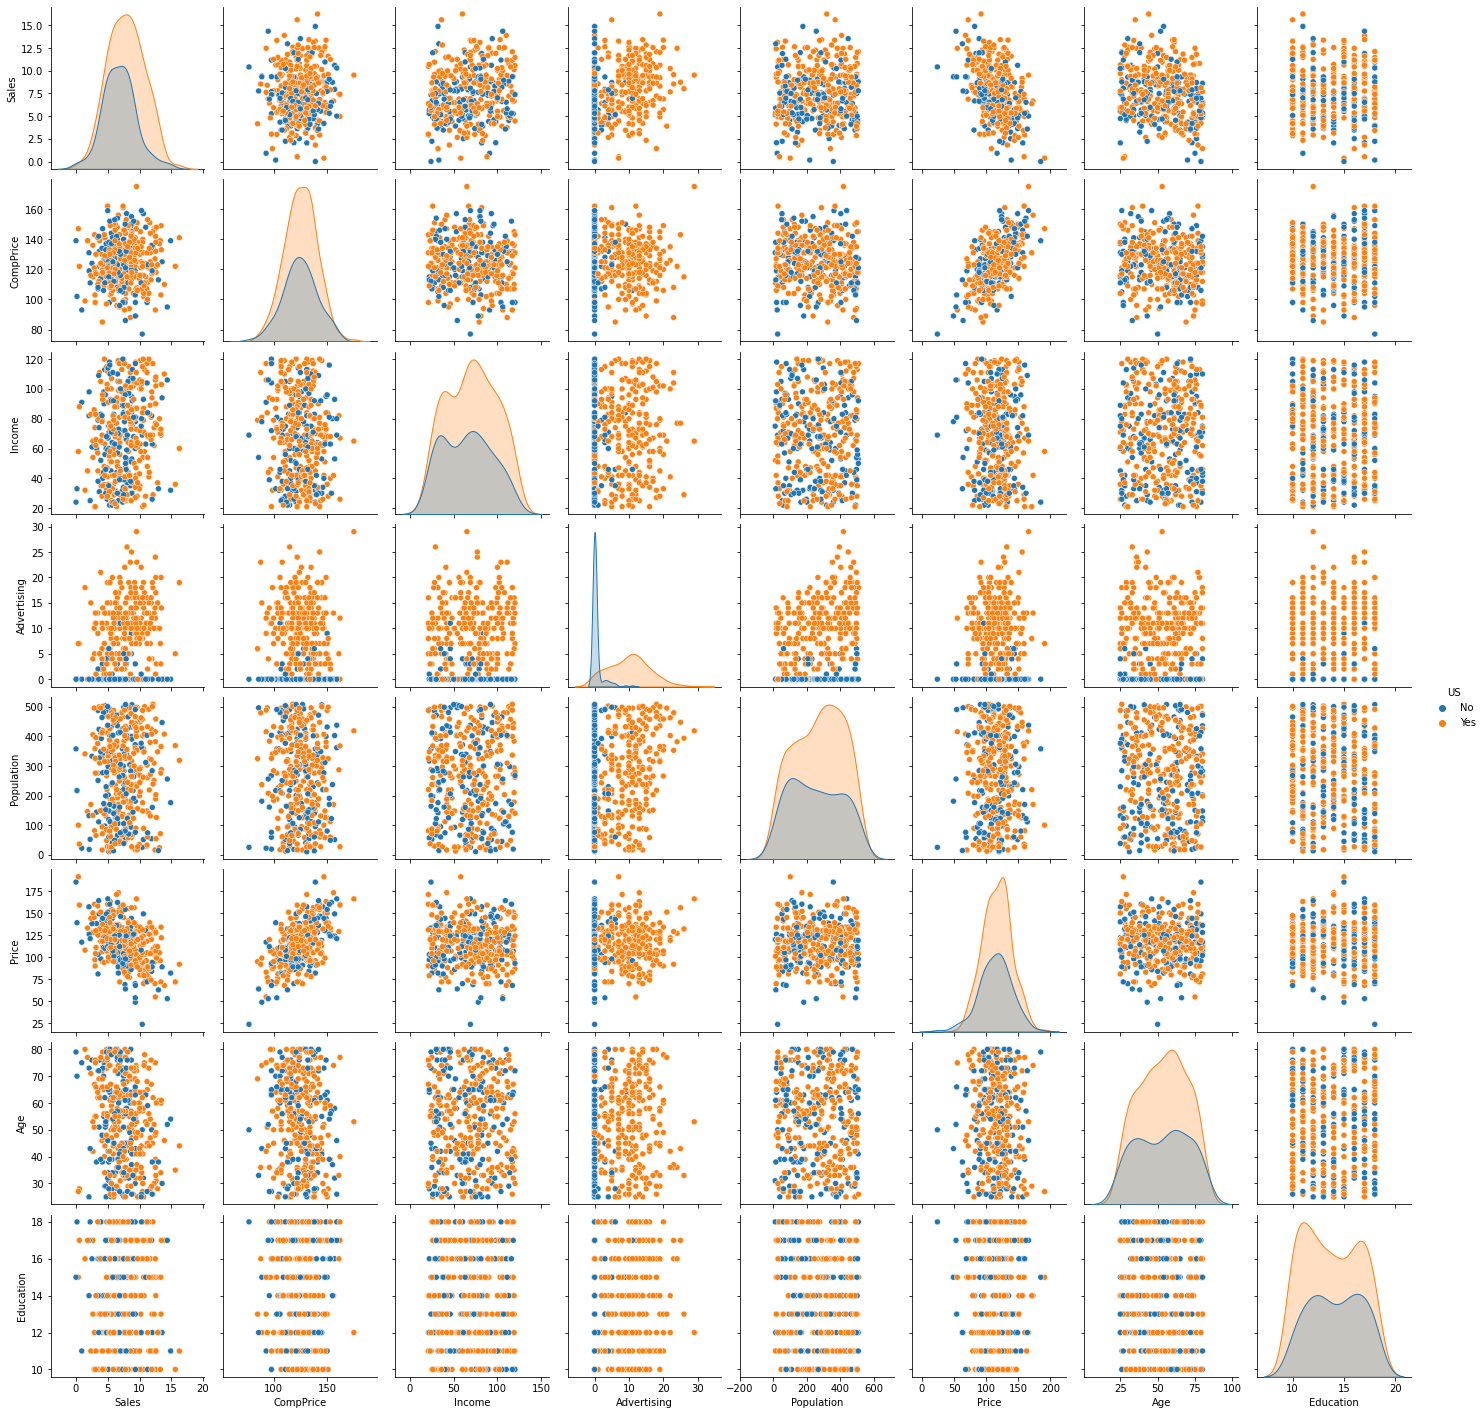

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

# pairplot with hue sex
sns.pairplot(company, hue ='US')

# to show
plt.show()

In [13]:
# checking the datatypes of the columns

company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

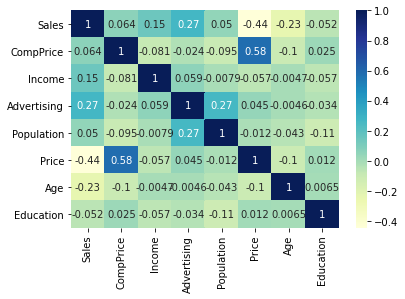

In [14]:
dataplot = sns.heatmap(company.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

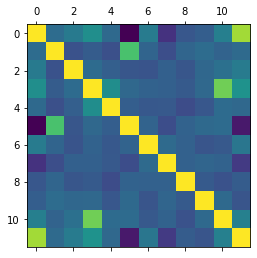

In [44]:
plt.matshow(company.corr())
plt.show()

In [15]:
# checking the sales mean 

sales_mean = company.Sales.mean()
sales_mean

7.496325

In [16]:
# creating the high column with condition where mean is greater than 8 of sales will be added only

company['High'] = company.Sales.map(lambda x: 1 if x > 8 else 0)  

In [17]:
# The column we just created with the condition

company.High

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [18]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [19]:
# labelling the shelveloc, urban, us column

label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [20]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [21]:
x = company.iloc[:,1:11]
y = company['High']

In [22]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [23]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: High, dtype: int64

In [24]:
# checking the unique values of the high column

company['High'].unique()

array([1, 0], dtype=int64)

In [25]:
# counting the values in the high column

company.High.value_counts()

0    236
1    164
Name: High, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [27]:
# Creating Decision tree model using C5.0 model

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, class_weight = 'balanced')

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

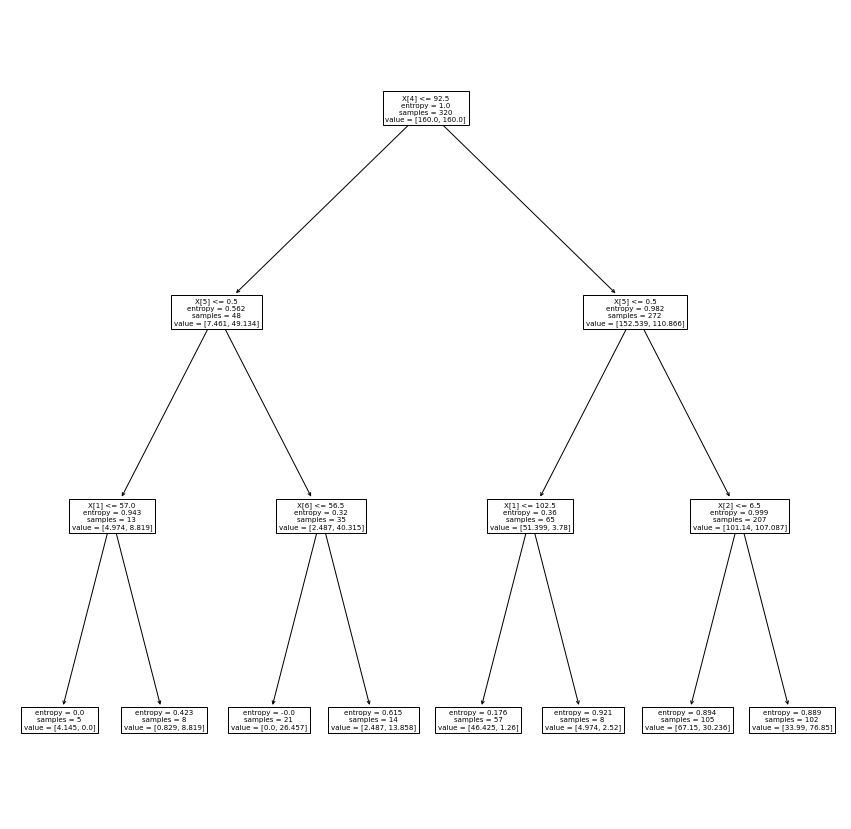

In [29]:
# PLotting the tree diagram

plt.figure(figsize=(15,15))  # set plot size (denoted in inches)
tree.plot_tree(model)
plt.show()

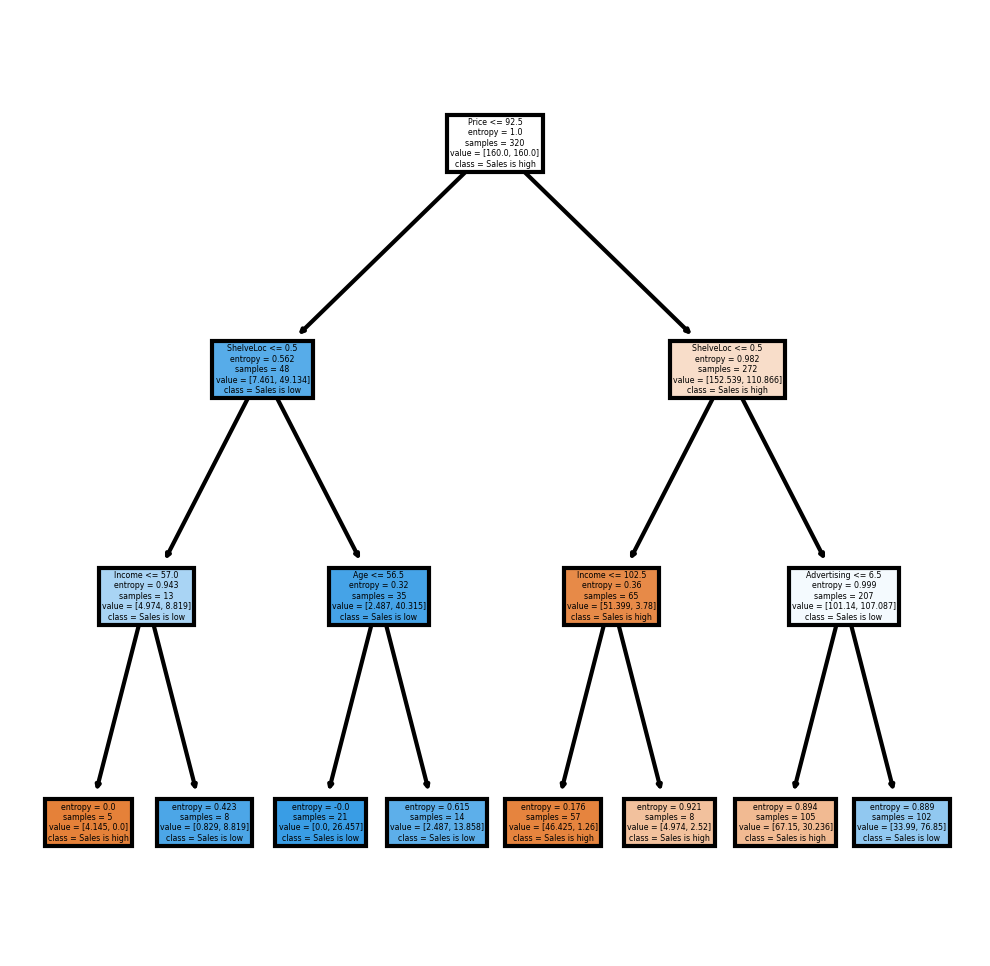

In [30]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']  #we will extract the features
cn = ['Sales is high', 'Sales is low']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)   
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [31]:
# Predicting the test data

prediction = model.predict(x_test)
pd.Series(prediction).value_counts()

0    45
1    35
dtype: int64

In [32]:
prediction

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [33]:
# Creating the crosstable

crosstable = pd.crosstab(y_test,prediction)
crosstable

col_0,0,1
High,,
0,33,10
1,12,25


In [34]:
np.mean(prediction==y_test)

0.725

In [35]:
# print function prints the classification report in a nice way

print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        45
           1       0.68      0.71      0.69        35

    accuracy                           0.73        80
   macro avg       0.72      0.72      0.72        80
weighted avg       0.73      0.72      0.73        80



In [36]:
# Creating the Desicion tree model using the CART method 

model_new = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, class_weight = 'balanced')

In [37]:
model_new.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

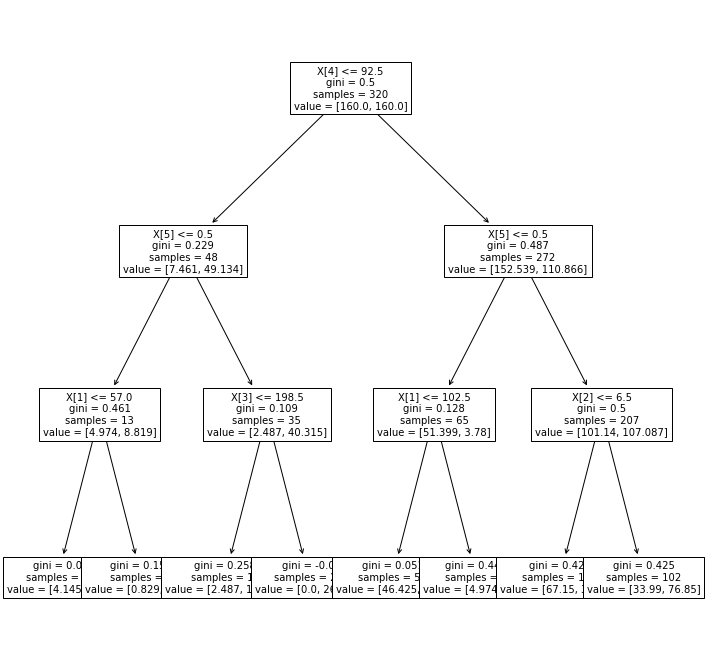

In [38]:
# plotting the tree diagram


plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(model_new, fontsize=10);
plt.show()


In [39]:
prediction_new = model_new.predict(x_test)

In [40]:
prediction_new

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [41]:
pd.Series(prediction_new).value_counts()

0    45
1    35
dtype: int64

In [45]:
np.mean(prediction_new == y_test)*100

72.5